Database has 600 images
Testing frames 50 to 150 (n=101)
1 zero values are not being shown
Testing frames 150 to 250 (n=101)
1 zero values are not being shown
Testing frames 250 to 350 (n=101)
1 zero values are not being shown
Testing frames 350 to 450 (n=101)
1 zero values are not being shown
Testing frames 450 to 550 (n=101)
1 zero values are not being shown


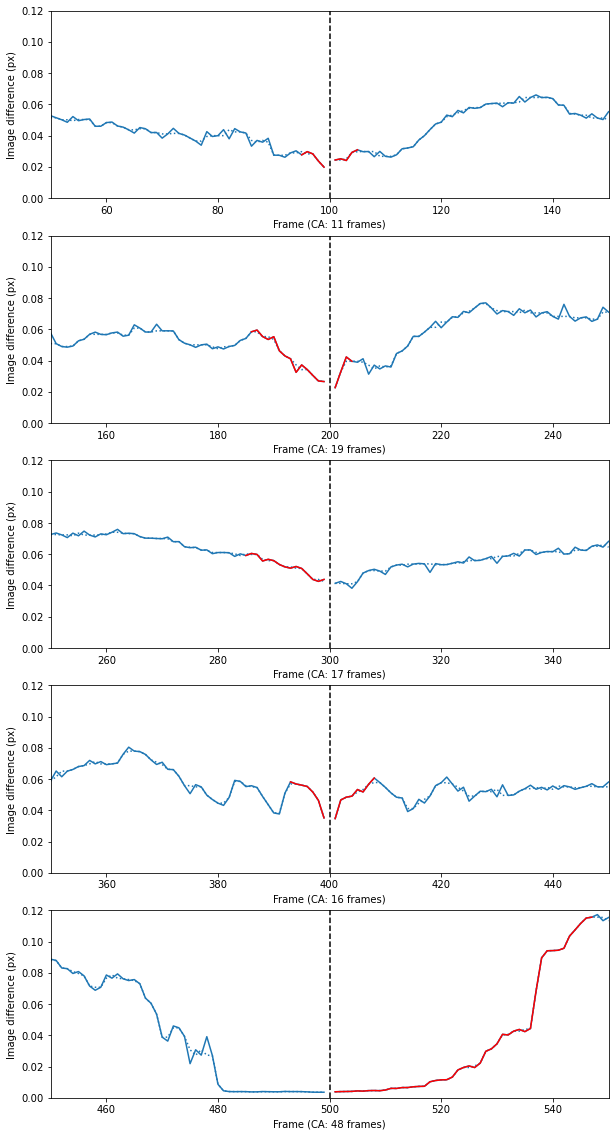

In [1]:
import sys
sys.path.append('../..')

import matplotlib.pyplot as plt
import navbench as nb
from navbench import improc as ip

plt.rcParams['figure.figsize'] = [10, 20]

# Boundaries for tests, e.g. a value of 50 means that 50 frames either side of the goal will be tested
FRAME_DIST  = 50

# 1 == include every frame, 2 == every other frame etc.
FR_STEP     = 1

# Rotational step for RIDF-type calculations
RIDF_STEP   = 2

# Size of median filter to apply to values
MEDFILT_SIZE = 3

# Image preprocessing pipeline - if you provide a tuple of functions then each will be applied to the image in turn
PREPROC     = ip.resize(180, 55)

# Which tests to perform
FRAMES      = range(100, 600, 100)

db = nb.Database("../../datasets/rc_car/Stanmer_park_dataset/0411/dataset1")
print('Database has %d images' % len(db))

_, axes = plt.subplots(len(FRAMES))
for fr, ax in zip(FRAMES, axes):
    # Load images + snapshot + range of entry indices
    (images, snap, entries) = db.load_test_frames(fr, FRAME_DIST, PREPROC, FR_STEP)

    # Get best-matching image across rotations for each point
    # (There is a route_idf function that doesn't use rotation)
    idf = nb.route_ridf(images, snap, step=RIDF_STEP)

    # Calculate catchment area and plot it
    ca = nb.calculate_ca(idf, medfilt_size=MEDFILT_SIZE)
    ca.plot(entries, ax=ax, ymax=0.12)
    ax.set_xlabel('Frame (CA: %d frames)' % ca.size())
    ax.set_ylabel('Image difference (px)')